In [1]:
# This practial work on decision trees uses https://scikit-learn.org/stable/modules/tree.html

import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# to get the documentation: use help(tree.DecisionTreeClassifier)


In [2]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

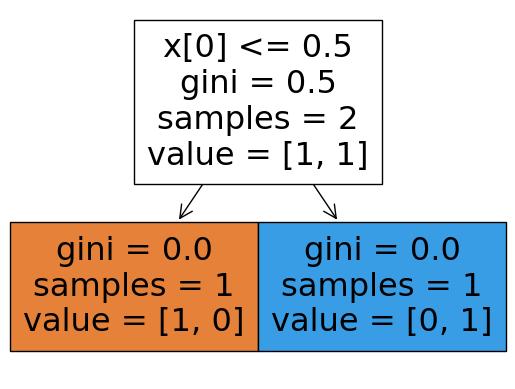

In [3]:
# display of the tree
tree.plot_tree(clf, filled=True)

## Question 1

What is the node test used to build the tree? Explain the prediction for the new sample.


[ANSWER HERE]

As written in the root node of the tree, the samples are separated using the value in $X[0]$, where we use the fact that Python's indexing starts at 0. So, equivalently, the decision is taken based on the first coordinate/element of the input vector. The test compares the value of $X[0]$, and if it's lower or equal to $0.5$, i.e. $X[0] \leq 0.5$, then the input's class is 0. If we have the opposite result in the test, i.e. $X[0] > 0.5$, its class will then be 1.

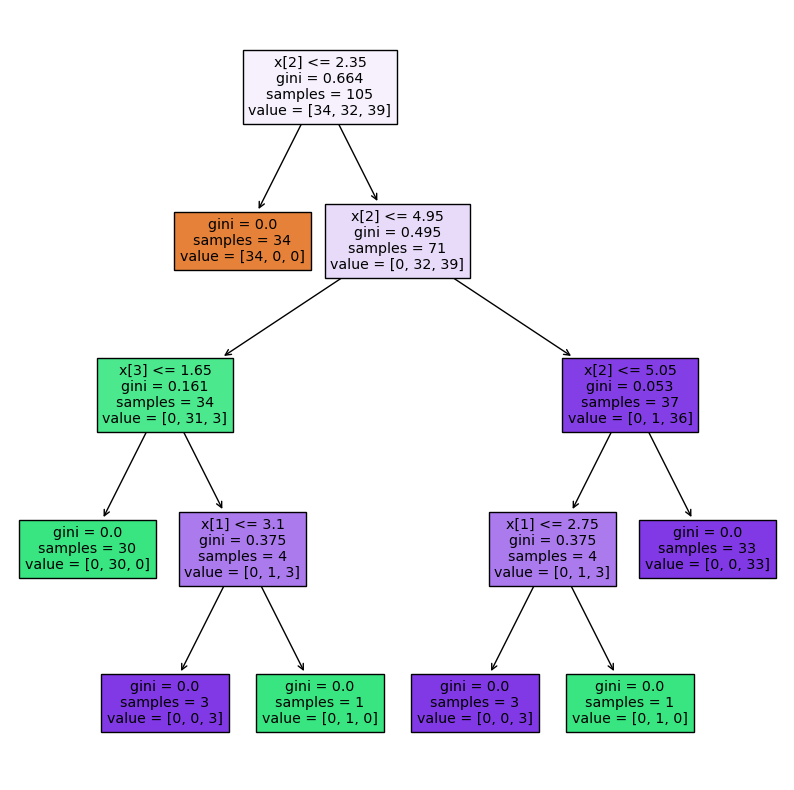

In [4]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [5]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)



0.9777777777777777

## Question 2

Question 2: change the initial splitting of the dataset by reducing the size of the training set. 

What do you observe on the tree? on the accuracy?

[ANSWER HERE]

Reducing the amount of training data limits the amount of information our model can learn with the dataset. It $\textit{should}$ reduce the amount of splits our tree makes, i.e. our tree will have fewer nodes and a smaller depth.

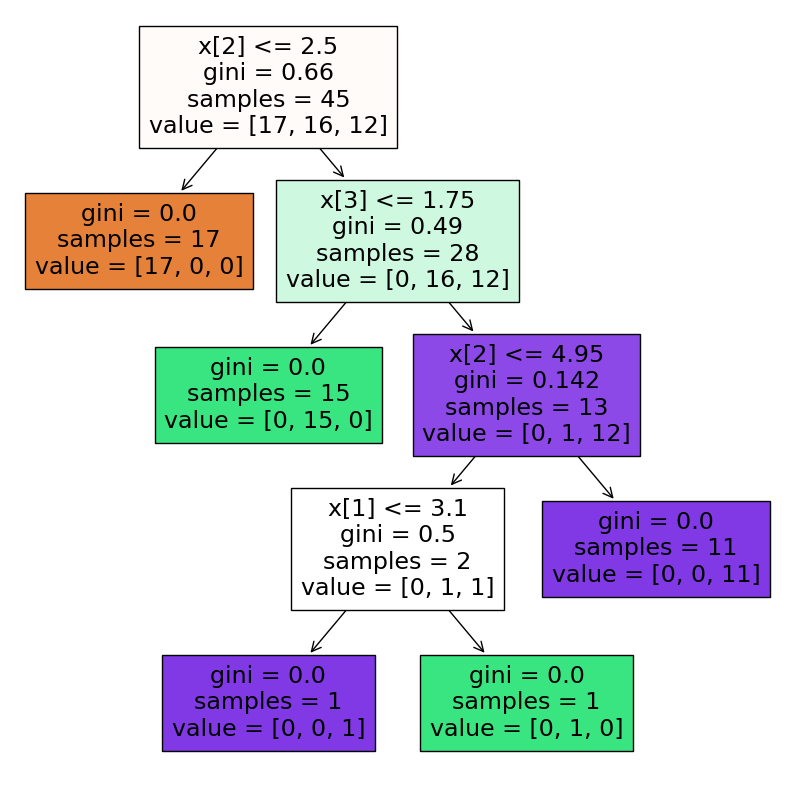

In [6]:
#We just remake the train_test split from earlier:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3, random_state=0)

clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

It should also decrease the accuracy in the test data, since the model is simpler and its generalization power, small.

In [7]:
# prediction on the test set and computation of the accuracy

clf.predict(X_test)
clf.score(X_test, y_test)


0.9523809523809523

Of course such results are not $\textit{always}$ the case. We make a loop for different partitions of the overall data to show its behavior and how different amounts of training data can both help $\textit{or}$ worsen our model's prediction. The scores are taken as an average of 100(or more) realizations to circumvent the sensitivity of the Decision Tree to the training data.

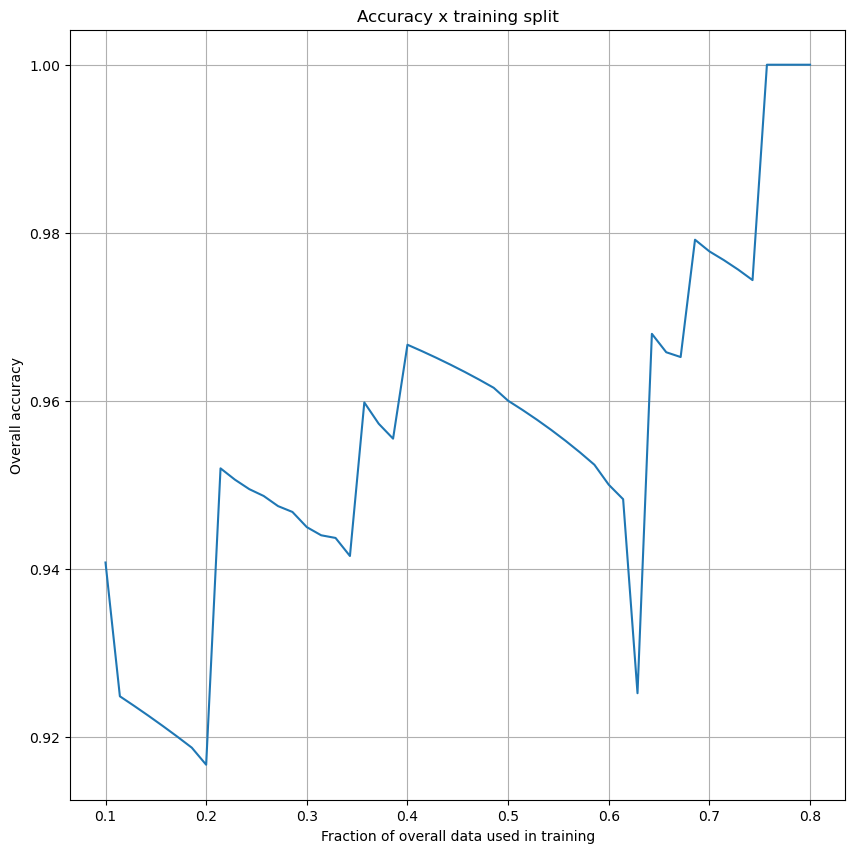

In [10]:
import numpy as np

realizations = 100

split_values = np.linspace(0.1,0.8, 50)
scores=[]
for value in split_values:
    score_dummy=0
    for i in range(realizations):

        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=value, random_state=0)
        clf = tree.DecisionTreeClassifier()
        
        clf.fit(X_train,y_train)
        clf.predict(X_test)
        score_dummy+=(clf.score(X_test,y_test)/realizations)
    scores.append(score_dummy)

plt.figure(figsize=(10,10))
plt.plot(split_values,scores)
plt.grid()
plt.title("Accuracy x training split")
plt.xlabel("Fraction of overall data used in training")
plt.ylabel("Overall accuracy")
plt.show()

## Question 3 
clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...). 


Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time.


Conclusion?

[ANSWER HERE]

max_depth controls the depth of our tree. Deep trees usually and more complex systems, and too much of a depth can actually lean our model in the $\textit{overfitting}$ regime, where it learns the training data set "by hearth", but has poor generalization power.

min_samples_leaf actually controls the smalles amount of samples each tree node can have. A higher amount can actually help in the overfitting of the data, leading each leaf to gather a more general behavior and not classify each sample individually (like a tree with $n$ nodes for $n$ training data points).

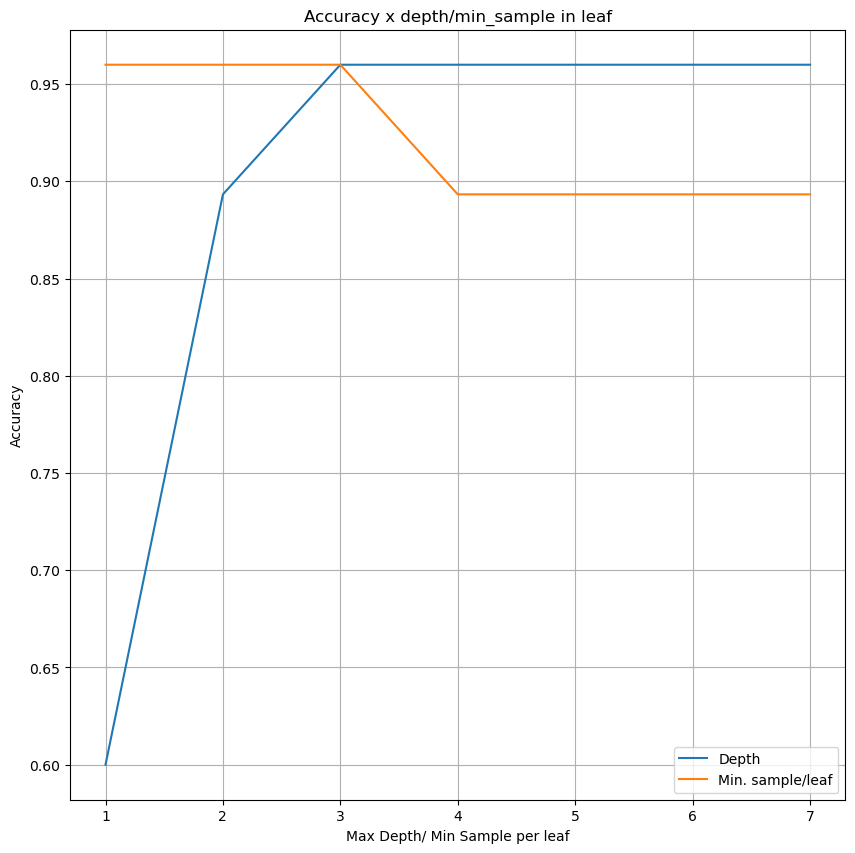

In [12]:
#We use the sama train/test split as before
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, random_state=0)

scores_depth=[]
scores_sampleleaf=[]

depth_values = list(range(1,8))
sample_values = list(range(1,8))

for value in depth_values:
    clf=tree.DecisionTreeClassifier(max_depth=value)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    scores_depth.append(clf.score(X_test,y_test))

for value in sample_values:
    clf=tree.DecisionTreeClassifier(min_samples_leaf=value)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    scores_sampleleaf.append(clf.score(X_test,y_test))

plt.figure(figsize=(10,10))
plt.grid()
plt.title("Accuracy x depth/min_sample in leaf")
plt.plot(depth_values,scores_depth,label="Depth")
plt.plot(sample_values,scores_sampleleaf,label="Min. sample/leaf")
plt.legend()
plt.xlabel("Max Depth/ Min Sample per leaf")
plt.ylabel("Accuracy")
plt.show()

We can also make a comparison of confusion matrices, that show false positives and negatives in classification.

In [16]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, clf.predict(X_test))
# print(cm)


print('Confusion matrices for different depths: ')
for value in depth_values:
    clf_depth = tree.DecisionTreeClassifier(max_depth=value)#max_depth=6 and min_sample = 1(default)
    clf_depth.fit(X_train,y_train)
    cm_depth = confusion_matrix(y_test,clf_depth.predict(X_test))
    print(cm_depth)
print('\n')

print('Confusion matrices for different min. samples in each leaf: ')
for value in sample_values:
    clf_minsam = tree.DecisionTreeClassifier(min_samples_leaf=value)#min_sample/leaf = 5 and as much depth as needed(default)
    clf_minsam.fit(X_train,y_train)
    cm_minsam = confusion_matrix(y_test,clf_minsam.predict(X_test))
    print(cm_minsam)

# print("Confusion matrix for a max depth of 6: \n",cm_depth)
# print("Confusion matrix for a min sample per leaf of 5: \n",cm_minsam)

Confusion matrices for different depths: 
[[21  0  0]
 [ 0  0 30]
 [ 0  0 24]]
[[21  0  0]
 [ 0 29  1]
 [ 0  7 17]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


Confusion matrices for different min. samples in each leaf: 
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
[[21  0  0]
 [ 0 29  1]
 [ 0  7 17]]
[[21  0  0]
 [ 0 29  1]
 [ 0  7 17]]
[[21  0  0]
 [ 0 29  1]
 [ 0  7 17]]
[[21  0  0]
 [ 0 29  1]
 [ 0  7 17]]


Where we see that for min. samples, we get more false classifications as each leaf contains more data objects(higher min. sample size in each leaf). Different depths also seemed to maintain the false classification errors after a certain depth, what actually matches what we saw in the graph above, with the accuracy hitting a plateau around max depth = 3. 

## Question 4:
 
by testing different trees (built with different parameter values), 
does a class appear as easier to classify than the others?

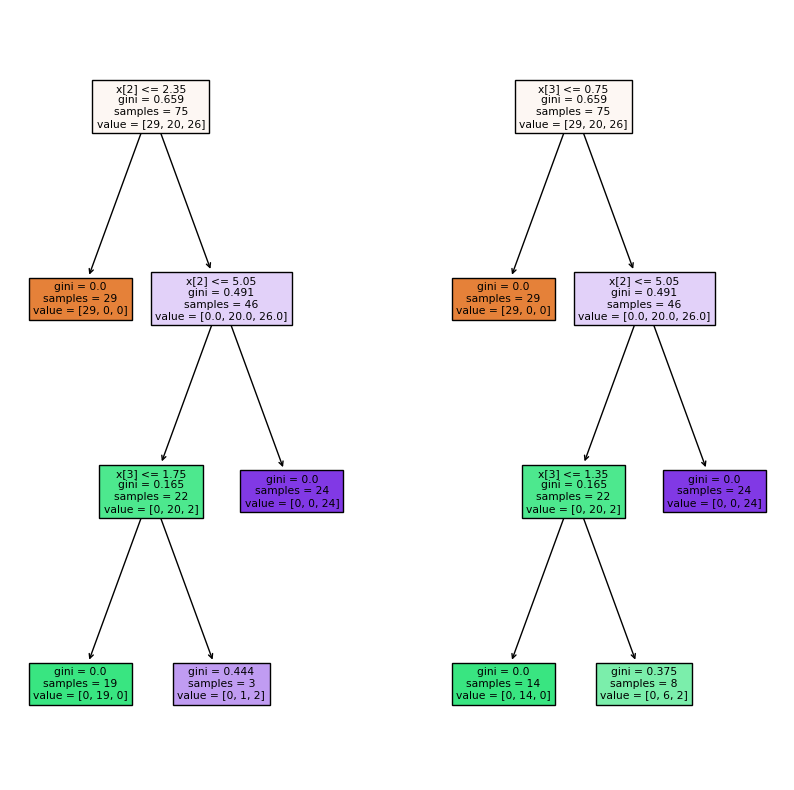

In [18]:
depth_random_value = np.random.choice(depth_values)
sample_random_value = np.random.choice(sample_values)

clf_depth = tree.DecisionTreeClassifier(max_depth=depth_random_value)
clf_depth.fit(X_train,y_train)

clf_minsam = tree.DecisionTreeClassifier(min_samples_leaf=sample_random_value)
clf_minsam.fit(X_train,y_train)


plt.figure(figsize=(10,10))
plt.subplot(121)
tree.plot_tree(clf_depth,filled=True)
plt.subplot(122)
tree.plot_tree(clf_minsam,filled=True) 
plt.show()

[ANSWER HERE]

As we saw throughout the other examples in this notebook, and with the two random trees just above this text, the 0 class is always classified in the first split. The article of the dataset [^test] mentions it's always linearly separable from the other two, so such a result is expected.

[^test]: Antony Unwin and Kim Kleinman. $\textit{The iris data set: In search of the source of virginica}$.Significance, 2021. Accessible in https://api.semanticscholar.org/CorpusID:244763032.
